Many helps from perplexity.ai for visualizations

Contents
- topological sorting
- DAG relaxation
- Counting path in DAG

# Topological sorting

['E', 'D', 'B', 'C', 'A']
['A', 'C', 'B', 'D', 'E']


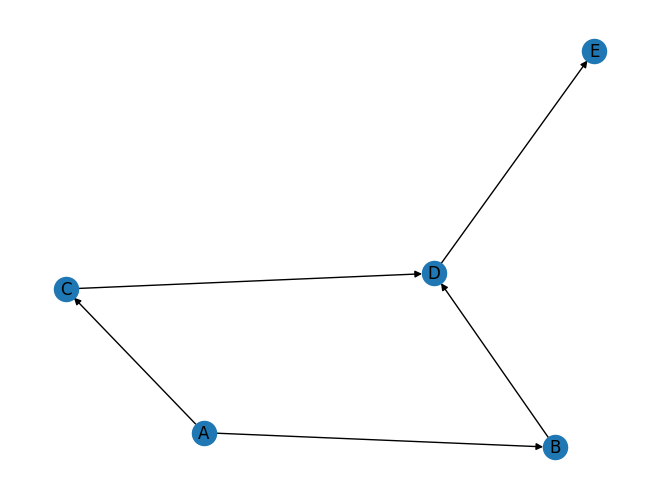

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

# DAG relaxation algorithm (same as before)
def topological_sort(graph):
    visited = set()
    stack = []

    def dfs(v):
        visited.add(v)
        for neighbor in graph[v]:
            if neighbor not in visited:
                dfs(neighbor)

        stack.append(v)

    for vertex in graph:
        if vertex not in visited:
            dfs(vertex)
    
    print(stack)

    return list(reversed(stack))

# Check topological_sort with an example graph
graph = {
    'A': ['B', 'C'],
    'B': ['D'],
    'C': ['D'],
    'D': ['E'],
    'E': []
}
print(topological_sort(graph))

# visualize the graph
G = nx.DiGraph()
for node in graph:
    G.add_node(node)
    for neighbor in graph[node]:
        G.add_edge(node, neighbor)

# draw the graph with the root as A
# pos = nx.draw_planar(G)
nx.draw(G, with_labels=True)
plt.show()

# DFS visiting order: A B D E C
# postorder traversal order: E D B C A
# topological order: A C B D E


In [2]:
def DAG_relaxation(graph, source):
    order = topological_sort(graph)
    D = {v: float('inf') for v in graph}
    P = {v: None for v in graph}
    D[source] = 0
    P[source] = source

    for u in order:
        for v, w_uv in graph[u].items():
            d_suv = D[u] + w_uv
            if D[v] > d_suv:
                D[v] = d_suv
                P[v] = u

    return D, P

def get_path(P, start, end):
    path = []
    current = end
    while current != start:
        path.append(current)
        current = P[current]
    path.append(start)
    return path[::-1]

# DAG relaxation

['F', 'D', 'B', 'E', 'C', 'A']
Shortest path from A to F: A -> C -> D -> F
Total distance: 12


/var/folders/mt/2lwg_v3j19v3bbpmxqm814cw0000gn/T/ipykernel_47037/3757390190.py:25: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


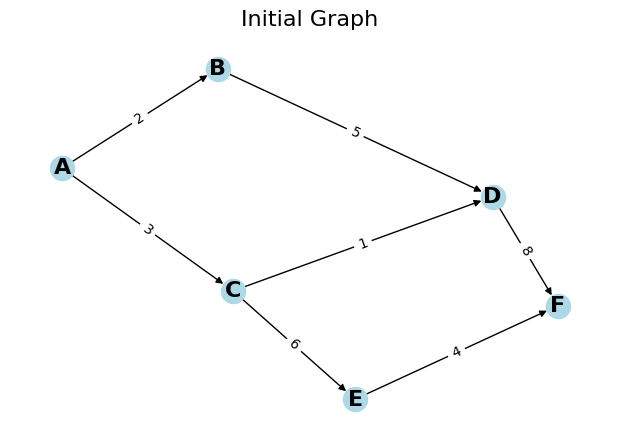

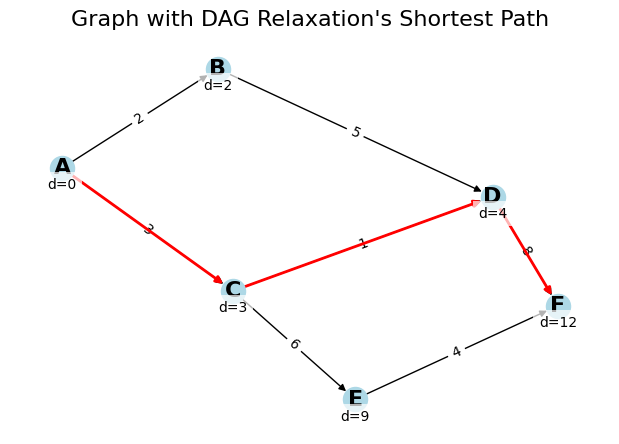

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

# utility function for drawing only
def draw_graph(G, pos, title, path=None, distances=None):
    plt.figure(figsize=(6, 4))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', 
            node_size=300, font_size=16, font_weight='bold', arrows=True)

    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    if path:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=2, arrows=True)

    if distances:
        for node, distance in distances.items():
            x, y = pos[node]
            plt.text(x, y-0.1, f'd={distance}', ha='center', va='center', 
                     bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

    plt.title(title, fontsize=16)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# example graph for DAG relaxation having 7 nodes
graph = {
    'A': {'B': 2, 'C': 3},
    'B': {'D': 5},
    'C': {'D': 1, 'E': 6},
    'D': {'F': 8},
    'E': {'F': 4},
    'F': {}
}

start_node = 'A'
end_node = 'F'

# Run Dijkstra's algorithm
D, P = DAG_relaxation(graph, start_node)

# Get the shortest path
shortest_path = get_path(P, start_node, end_node)

print(f"Shortest path from {start_node} to {end_node}: {' -> '.join(shortest_path)}")
print(f"Total distance: {D[end_node]}")

# Create a NetworkX graph
G = nx.DiGraph(graph)
pos = nx.spring_layout(G)

# for each edge in graph add the weight using nx.set_edge_attributes
for u, neighbors in graph.items():
    for v, weight in neighbors.items():
        G[u][v]['weight'] = weight

# Draw the initial graph
draw_graph(G, pos, "Initial Graph")

# Draw the graph with Dijkstra's shortest path
draw_graph(G, pos, "Graph with DAG Relaxation's Shortest Path", shortest_path, D)

# Counting paths in DAG

['J', 'H', 'I', 'F', 'G', 'D', 'E', 'B', 'C', 'A']
defaultdict(<class 'int'>, {'A': 1, 'B': 1, 'C': 1, 'D': 2, 'E': 2, 'F': 4, 'G': 4, 'H': 8, 'I': 8, 'J': 16})
The number of paths from A to F is 16


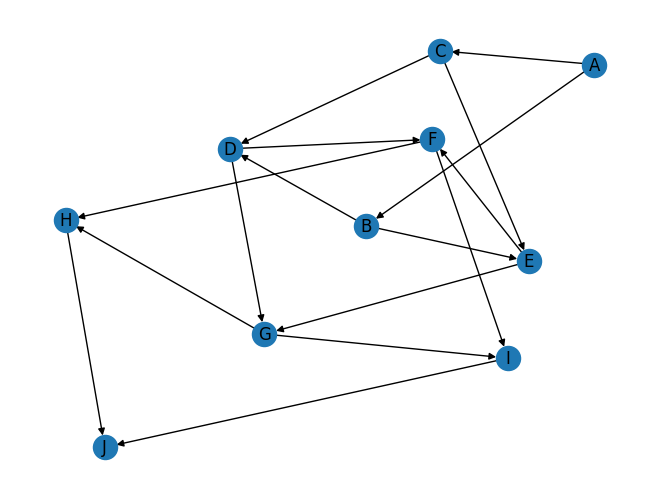

In [5]:

import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

# DAG relaxation algorithm (same as before)
def topological_sort(graph):
    visited = set()
    stack = []

    def dfs(v):
        visited.add(v)
        for neighbor in graph[v]:
            if neighbor not in visited:
                dfs(neighbor)

        stack.append(v)

    for vertex in graph:
        if vertex not in visited:
            dfs(vertex)
    
    print(stack)

    return list(reversed(stack))

# DAG graph example with 5 nodes with slightly dense connections


graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['D', 'E'],
    'D': ['F', 'G'],
    'E': ['F', 'G'],
    'F': ['H', 'I'],
    'G': ['H', 'I'],
    'H': ['J'],
    'I': ['J'],
    'J': []
}
v_sorted = topological_sort(graph)

# Counting path
def count_paths(graph, v_sorted):
    count = defaultdict(int)
    count[v_sorted[0]] = 1

    for v in v_sorted:
        for neighbor in graph[v]:
            count[neighbor] += count[v]

    return count

npaths_label = count_paths(graph, v_sorted)
print(npaths_label)
print(f"The number of paths from A to F is {npaths_label['J']}")

# visualize the graph with the number of paths
G = nx.DiGraph()
for node in graph:
    G.add_node(node)

    for neighbor in graph[node]:
        G.add_edge(node, neighbor) 

# draw the graph with the root as A
pos = nx.planar_layout(G)
nx.draw(G, with_labels=True)

# for node, val in npaths_label.items():
#     x, y = pos[node]
#     plt.text(x, y-0.01, f'p={val}', ha='center', va='center', 
#                 bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

plt.show()